In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns

df_orig = pd.read_csv('some_prepar.csv')

In [22]:
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              9709 non-null   int64  
 1   url             9709 non-null   object 
 2   region          9709 non-null   object 
 3   region_url      9709 non-null   object 
 4   price           9709 non-null   int64  
 5   year            9709 non-null   int64  
 6   manufacturer    9339 non-null   object 
 7   model           9709 non-null   object 
 8   fuel            9709 non-null   object 
 9   odometer        9673 non-null   float64
 10  title_status    9709 non-null   object 
 11  transmission    9709 non-null   object 
 12  image_url       9709 non-null   object 
 13  description     9709 non-null   object 
 14  state           9709 non-null   object 
 15  lat             9613 non-null   float64
 16  long            9613 non-null   float64
 17  posting_date    9709 non-null   o

In [23]:
df_orig.odometer.isna().sum()/len(df_orig)

0.003707899886703059

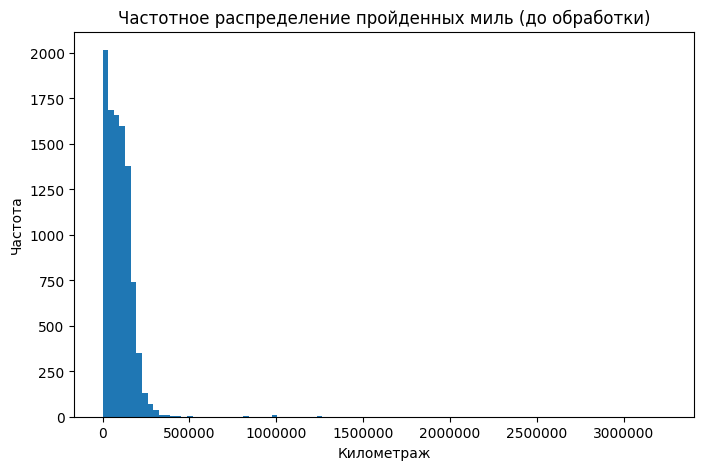

In [24]:
df_prep = df_orig.copy()
df_prep.odometer = df_orig.odometer.fillna(df_orig.odometer.mean())

fig, ax = plt.subplots(figsize=(8, 5))

ax.set_xlabel(xlabel="Километраж")
ax.set_ylabel(ylabel="Частота")
ax.set_title(label="Частотное распределение пройденных миль (до обработки)")
ax.hist(df_prep.odometer, bins=100)

ax.xaxis.set_major_formatter(FormatStrFormatter("%.0f"))

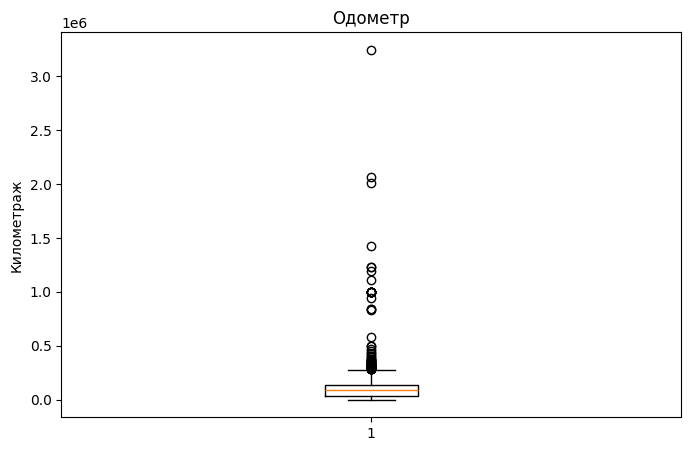

In [25]:
plt.figure(figsize=(8, 5))
plt.boxplot(df_prep.odometer)
plt.ylabel(ylabel="Километраж")
plt.title(label="Одометр")
plt.show()

In [26]:
q75 = df_prep.odometer.quantile(0.75)
q25 = df_prep.odometer.quantile(0.25)
board = q75 + 1.5 * (q75 - q25)
board, df_prep.odometer.max()

(283252.5, 3245000.0)

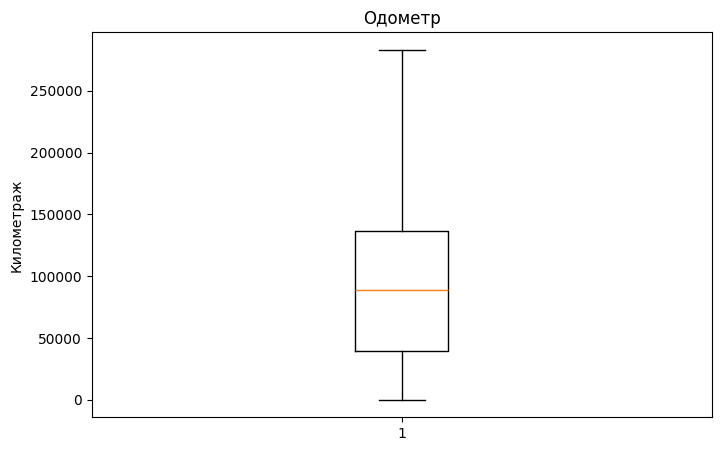

In [27]:
df_prep.loc[(df_prep.odometer > board), "odometer"] = board

plt.figure(figsize=(8, 5))
plt.boxplot(df_prep.odometer)
plt.ylabel(ylabel="Километраж")
plt.title(label="Одометр")
plt.show()

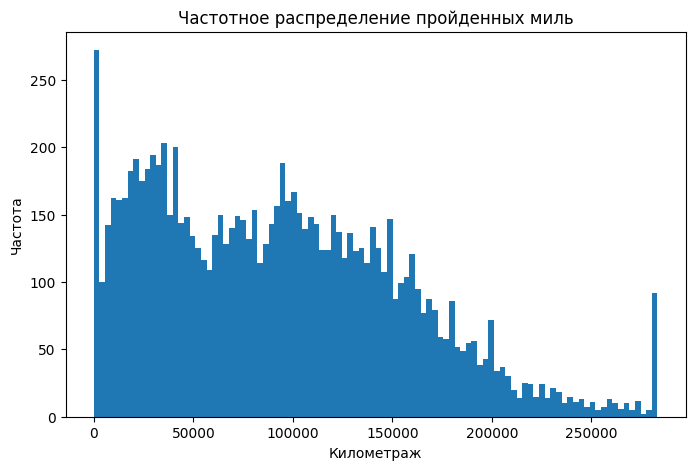

In [28]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.set_xlabel(xlabel="Километраж")
ax.set_ylabel(ylabel="Частота")
ax.set_title(label="Частотное распределение пройденных миль")
ax.hist(df_prep.odometer, bins=100)

ax.xaxis.set_major_formatter(FormatStrFormatter("%.0f"))

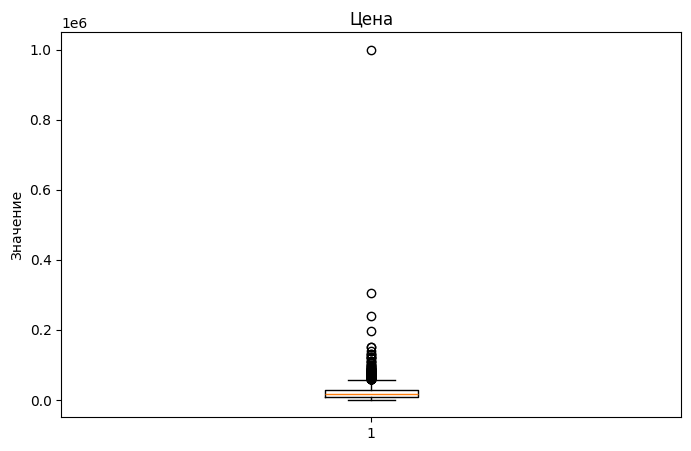

In [29]:
plt.figure(figsize=(8, 5))
plt.boxplot(df_prep.price)
plt.ylabel(ylabel="Значение")
plt.title(label="Цена")
plt.show()

In [30]:
q75 = df_prep.price.quantile(0.75)
q25 = df_prep.price.quantile(0.25)
board = q75 + 1.5 * (q75 - q25)
board, df_prep.price.max()

(58125.0, 1000000)

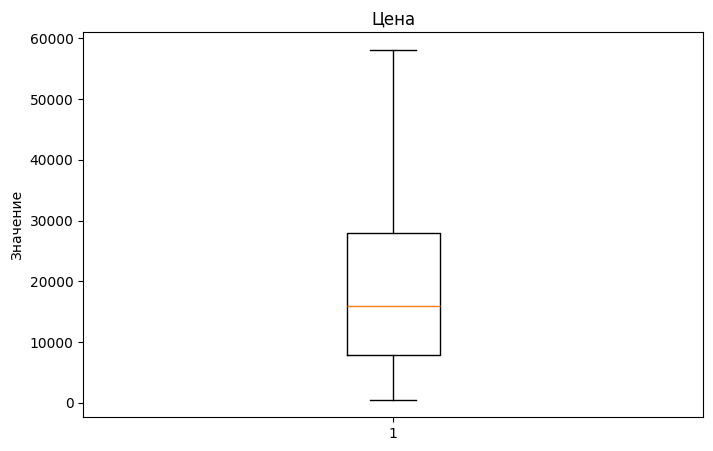

In [31]:
df_prep.loc[(df_prep.price > board), "price"] = board

plt.figure(figsize=(8, 5))
plt.boxplot(df_prep.price)
plt.ylabel(ylabel="Значение")
plt.title(label="Цена")
plt.show()

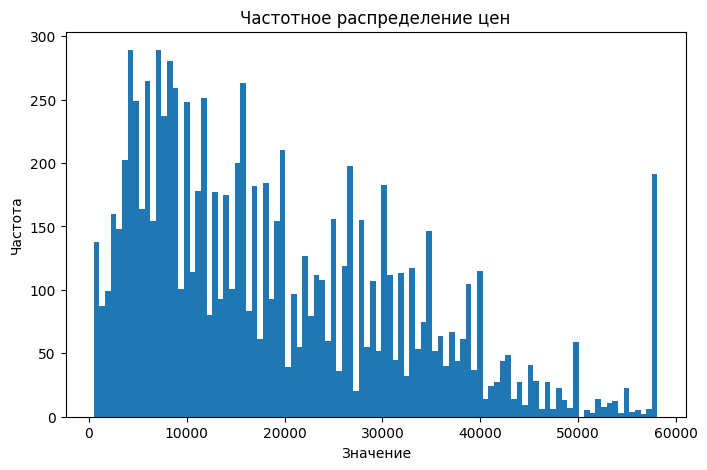

In [32]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.set_xlabel(xlabel="Значение")
ax.set_ylabel(ylabel="Частота")
ax.set_title(label="Частотное распределение цен")
ax.hist(df_prep.price, bins=100)

ax.xaxis.set_major_formatter(FormatStrFormatter("%.0f"))

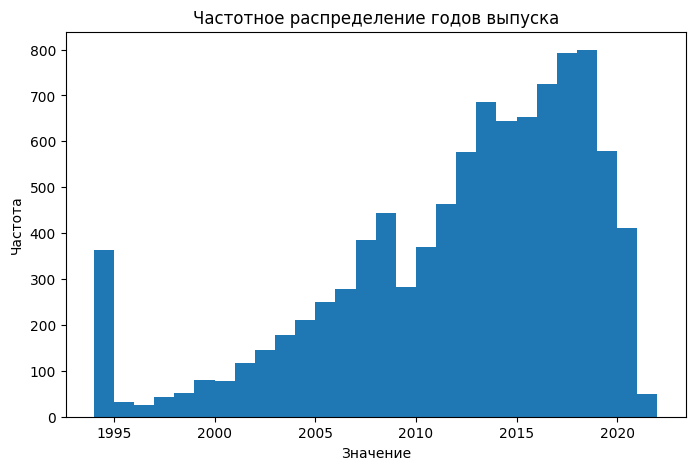

In [33]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.set_xlabel(xlabel="Значение")
ax.set_ylabel(ylabel="Частота")
ax.set_title(label="Частотное распределение годов выпуска")
ax.hist(df_prep.year, bins=28)

ax.xaxis.set_major_formatter(FormatStrFormatter("%.0f"))

<BarContainer object of 5 artists>

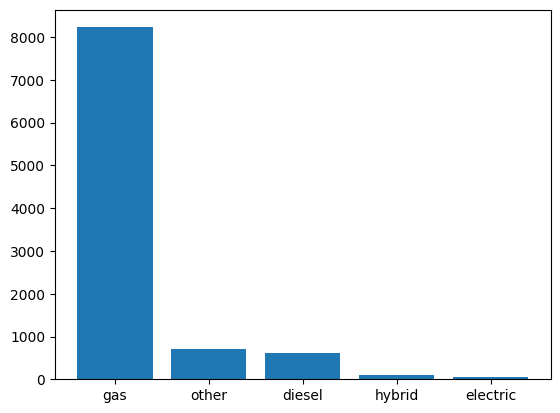

In [34]:
fuel_counts = df_prep.fuel.value_counts()
categories = np.array(fuel_counts.keys())
freq = np.array(fuel_counts.values)
freq = [int(x) for x in freq]
plt.bar(categories, freq)

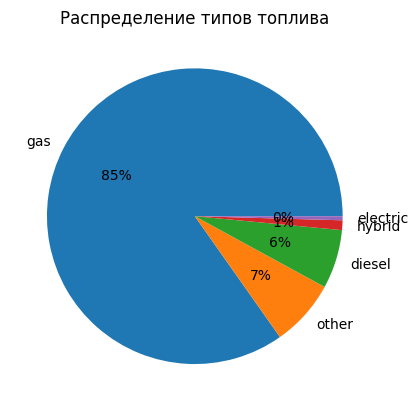

In [35]:
plt.pie(fuel_counts, labels=fuel_counts.index, autopct="%1.0f%%")
plt.title(label="Распределение типов топлива")
plt.show()

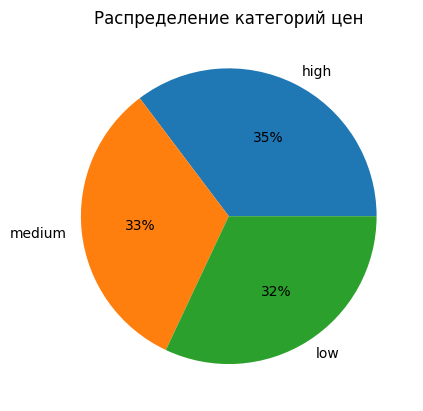

In [36]:
prcat_counts = df_prep.price_category.value_counts()
plt.pie(prcat_counts, labels=prcat_counts.index, autopct="%1.0f%%")
plt.title(label="Распределение категорий цен")
plt.show()

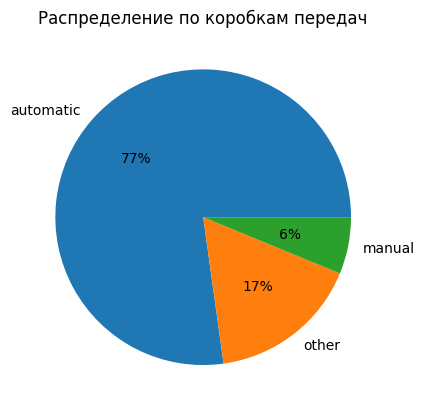

In [37]:
trans_counts = df_prep.transmission.value_counts()
plt.pie(trans_counts, labels=trans_counts.index, autopct="%1.0f%%")
plt.title(label="Распределение по коробкам передач")
plt.show()

In [38]:
dftmp = df_prep.copy()
dftmp.to_csv("some_prepar2.csv", index=False)
dftmp = dftmp.drop(["id", "url", "region", "manufacturer", "model", "region_url", "image_url", "posting_date", "description", "state", "lat", "long"], axis=1)

dftmp

,price,year,fuel,odometer,title_status,transmission,price_category
0,54990,2020,diesel,27442.0,clean,other,high
1,16942,2016,gas,60023.0,clean,automatic,medium
2,35590,2017,gas,14048.0,clean,other,high
3,14500,2013,gas,117291.0,clean,automatic,medium
4,21800,2021,gas,8000.0,clean,automatic,medium
...,...,...,...,...,...,...,...
9704,4495,2002,gas,150000.0,clean,automatic,low
9705,14495,2008,gas,113573.0,clean,other,medium
9706,8995,2011,gas,150184.0,clean,automatic,low
9707,31900,2015,hybrid,61943.0,clean,automatic,high


In [39]:
uniqfuel = dftmp.fuel.unique().tolist()
for i in range(len(uniqfuel)):
    dftmp.loc[dftmp.fuel == uniqfuel[i], "fuel"] = i


uniqstat = dftmp.title_status.unique().tolist()
for i in range(len(uniqstat)):
    dftmp.loc[dftmp.title_status == uniqstat[i], "title_status"] = i


uniqtrans = dftmp.transmission.unique().tolist()
for i in range(len(uniqtrans)):
    dftmp.loc[dftmp.transmission == uniqtrans[i], "transmission"] = i


uniqpc = dftmp.price_category.unique().tolist()
for i in range(len(uniqpc)):
    dftmp.loc[dftmp.price_category == uniqpc[i], "price_category"] = i


dftmp

,price,year,fuel,odometer,title_status,transmission,price_category
0,54990,2020,0,27442.0,0,0,0
1,16942,2016,1,60023.0,0,1,1
2,35590,2017,1,14048.0,0,0,0
3,14500,2013,1,117291.0,0,1,1
4,21800,2021,1,8000.0,0,1,1
...,...,...,...,...,...,...,...
9704,4495,2002,1,150000.0,0,1,2
9705,14495,2008,1,113573.0,0,0,1
9706,8995,2011,1,150184.0,0,1,2
9707,31900,2015,4,61943.0,0,1,0


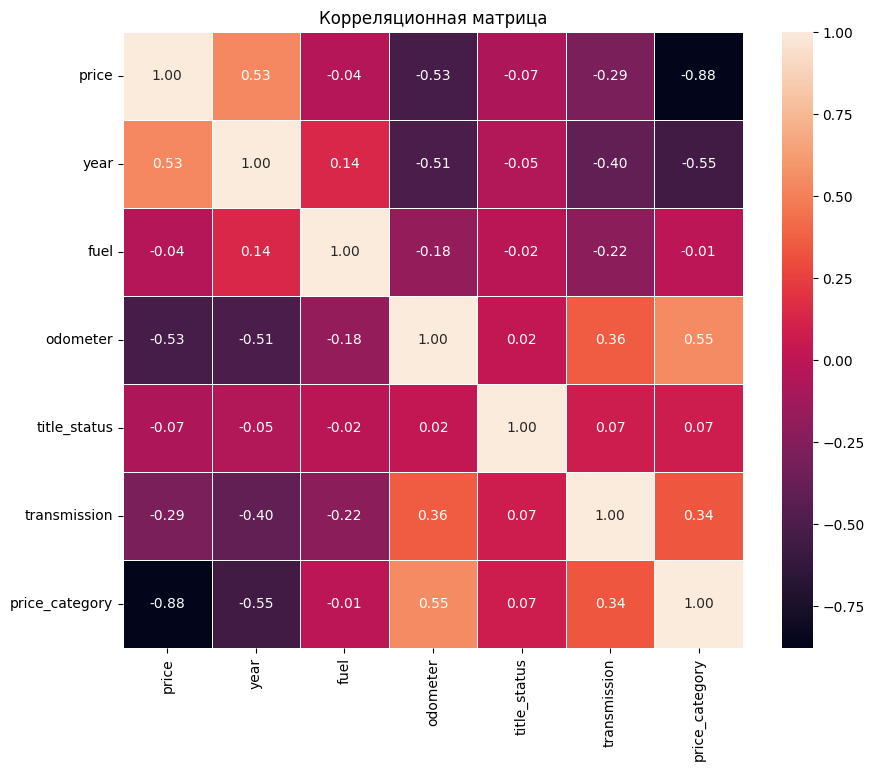

In [40]:
correlation_matrix = dftmp.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', linewidths=0.5)
plt.title('Корреляционная матрица')
plt.show()

В этой матрице отражены статистические зависимости между данными

Например очевидно, что категория цены должна хорошо зависеть от самой цены. Это показано в виде модуля корелляции 0.88, что довольно много. Есть и другие связи типа зависимости цены от пробега и неочевидные типа зависимости пробега от года